In [1]:
from keras import layers

embedding_layer = layers.Embedding(input_dim=1000,
                                   output_dim=64)

Using TensorFlow backend.


In [3]:
from keras import datasets
from keras import preprocessing

# Choose most frequently used 10000 words in dataset.
max_features = 10000
# Use only first 20 words of samples.
max_length = 20

(train_data, train_labels), (test_data, test_labels) = datasets.imdb.load_data(num_words=max_features)

train_data = preprocessing.sequence.pad_sequences(train_data, maxlen=max_length)
test_data = preprocessing.sequence.pad_sequences(test_data, maxlen=max_length)

In [5]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Embedding(input_dim=10000,
                           output_dim=8,
                           input_length=max_length))
model.add(layers.Flatten())
model.add(layers.Dense(units=1, activation='sigmoid'))

In [6]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

In [7]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 20, 8)             80000     
_________________________________________________________________
flatten_1 (Flatten)          (None, 160)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 161       
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________


In [8]:
history = model.fit(train_data, train_labels,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 2s 109us/step - loss: 0.6728 - acc: 0.6113 - val_loss: 0.6261 - val_acc: 0.6888
Epoch 2/10
20000/20000 [==============================] - 1s 54us/step - loss: 0.5488 - acc: 0.7481 - val_loss: 0.5293 - val_acc: 0.7340
Epoch 3/10
20000/20000 [==============================] - 1s 58us/step - loss: 0.4652 - acc: 0.7862 - val_loss: 0.5006 - val_acc: 0.7454
Epoch 4/10
20000/20000 [==============================] - 1s 63us/step - loss: 0.4239 - acc: 0.8081 - val_loss: 0.4934 - val_acc: 0.7472
Epoch 5/10
20000/20000 [==============================] - 1s 54us/step - loss: 0.3957 - acc: 0.8248 - val_loss: 0.4926 - val_acc: 0.7552
Epoch 6/10
20000/20000 [==============================] - 1s 55us/step - loss: 0.3737 - acc: 0.8371 - val_loss: 0.4964 - val_acc: 0.7570
Epoch 7/10
20000/20000 [==============================] - 1s 56us/step - loss: 0.3536 - acc: 0.8474 - val_loss: 0.4998 - val_acc

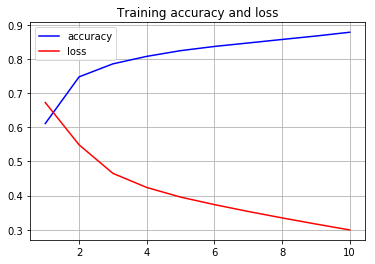

In [11]:
import numpy as np
import matplotlib.pyplot as plt

acc = history.history['acc']
loss = history.history['loss']

epochs = np.arange(len(acc)) + 1

plt.figure('Training accuracy and loss')
plt.title('Training accuracy and loss')
plt.plot(epochs, acc, color='b', label='accuracy')
plt.plot(epochs, loss, color='r', label='loss')
plt.legend()
plt.grid()
plt.show()

In [14]:
eval_loss, eval_acc = model.evaluate(test_data, test_labels)

print('Accuracy in test dataset = ', eval_acc)

25000/25000 [==============================] - 1s 22us/step
Accuracy in test dataset =  0.75752
